In [64]:
#importando librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [65]:
data = pd.read_csv("./dataset_discretizado.csv")

In [66]:
def ordenar(categorias):
    numeros_categorias = [(float(re.split(r'-', cat)[0]), cat) for cat in categorias]
    numeros_categorias.sort(key=lambda x: x[0])
    categorias_ordenadas = [cat for _, cat in numeros_categorias]
    
    return categorias_ordenadas

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9734 entries, 0 to 9733
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              9734 non-null   int64 
 1   SOCIO                   9734 non-null   object
 2   CUENTA                  9734 non-null   int64 
 3   AGENCIA                 9734 non-null   int64 
 4   TIPO_SOCIO              9734 non-null   int64 
 5   MONEDA                  9734 non-null   object
 6   PAGARE                  9734 non-null   object
 7   PRODUCTO                9734 non-null   object
 8   FEC_ULT_PAGO            9734 non-null   object
 9   DIAS                    9734 non-null   int64 
 10  NOM_FRECUENCIA          9734 non-null   object
 11  ESTADO_CIVIL            9734 non-null   object
 12  SEXO                    9734 non-null   object
 13  TIPO_VIVIENDA           9734 non-null   object
 14  OTORGA                  9734 non-null   object
 15  RIES

In [68]:
lista = ordenar(set(data['TEA_INTERES'].unique()))
type(lista)

list

## ANALISIS RESPECTO AL RIESGO

<Axes: xlabel='RIESGO_INDIVIDUAL', ylabel='TEA_INTERES'>

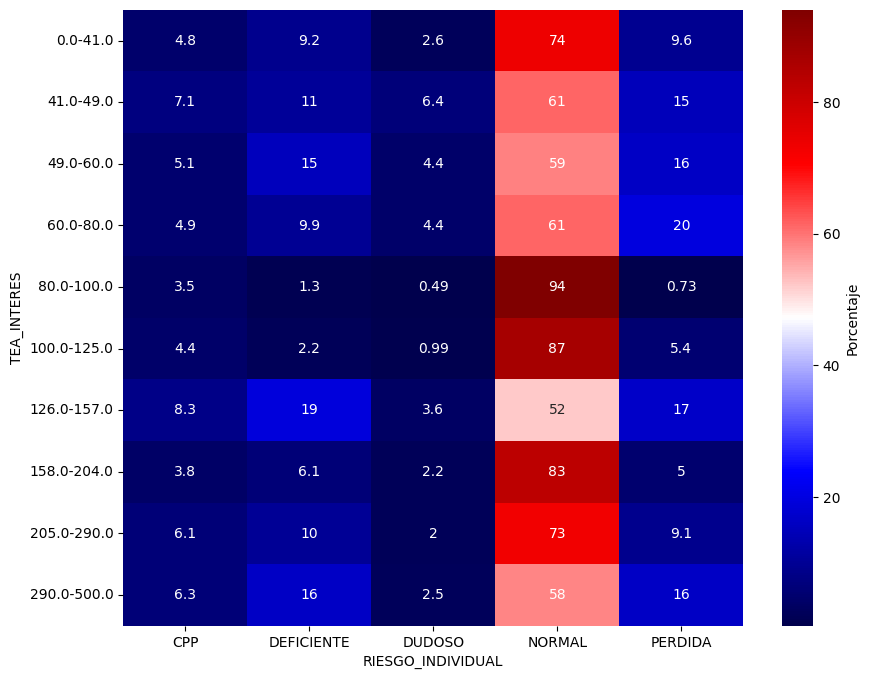

In [69]:
TeaxMorosidad = 100 * pd.crosstab(data['TEA_INTERES'], data['RIESGO_INDIVIDUAL'], normalize='index')
TeaxMorosidad = TeaxMorosidad.reindex(ordenar(TeaxMorosidad.index))
plt.figure(figsize=(10, 8))
sns.heatmap(TeaxMorosidad, annot=True, cmap='seismic', cbar_kws={'label': 'Porcentaje'})

<Axes: xlabel='RIESGO_INDIVIDUAL', ylabel='CUOTA_FIJA'>

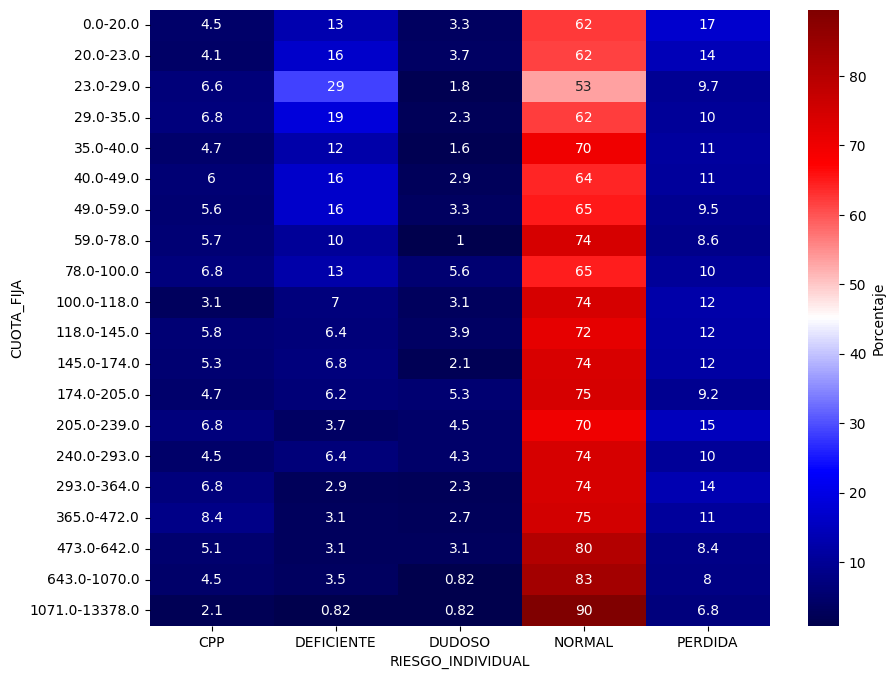

In [70]:
CuoFijaxMorosidad = 100*pd.crosstab(data['CUOTA_FIJA'], data['RIESGO_INDIVIDUAL'], normalize='index').sort_index(ascending=True)
CuoFijaxMorosidad = CuoFijaxMorosidad.reindex(ordenar(CuoFijaxMorosidad.index))
plt.figure(figsize=(10, 8))
sns.heatmap(CuoFijaxMorosidad, annot=True, cmap='seismic', cbar_kws={'label': 'Porcentaje'})

In [71]:
pd.crosstab(data['EDAD'], data['RIESGO_INDIVIDUAL'])

RIESGO_INDIVIDUAL,CPP,DEFICIENTE,DUDOSO,NORMAL,PERDIDA
EDAD,,,,,
18-25,63,101,41,630,90
25-35,144,283,84,1880,323
35-45,154,293,87,2018,358
45-55,113,163,39,1436,193
55-65,41,84,30,761,85
65+,10,23,3,183,21


<Axes: xlabel='RIESGO_INDIVIDUAL', ylabel='EDAD'>

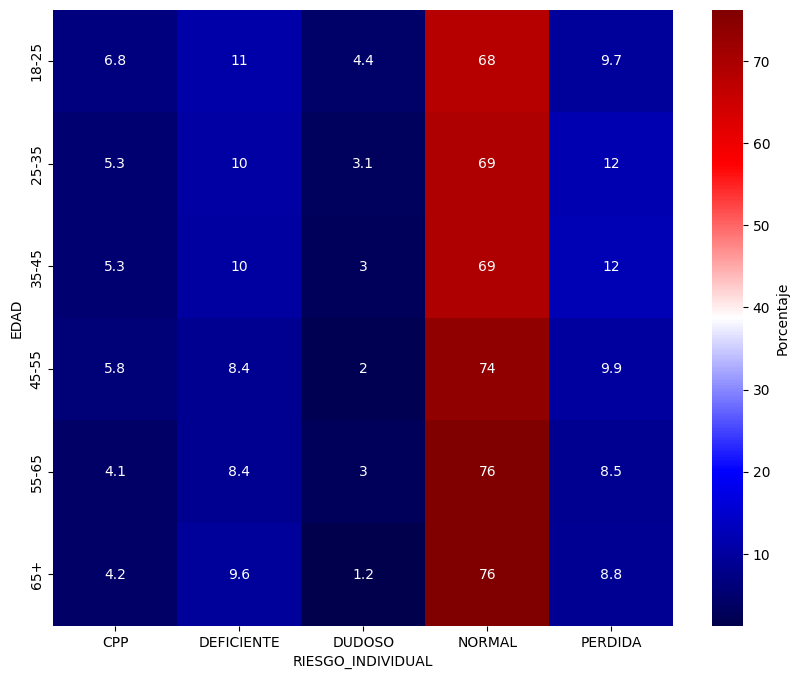

In [72]:
MorosidadxEdad = 100*pd.crosstab(data['EDAD'], data['RIESGO_INDIVIDUAL'], normalize='index')
plt.figure(figsize=(10, 8))
sns.heatmap(MorosidadxEdad, annot=True, cmap='seismic', cbar_kws={'label': 'Porcentaje'})

## ANALISIS DE LA DISTRIBUCION DEL DATASET

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27500\929392563.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


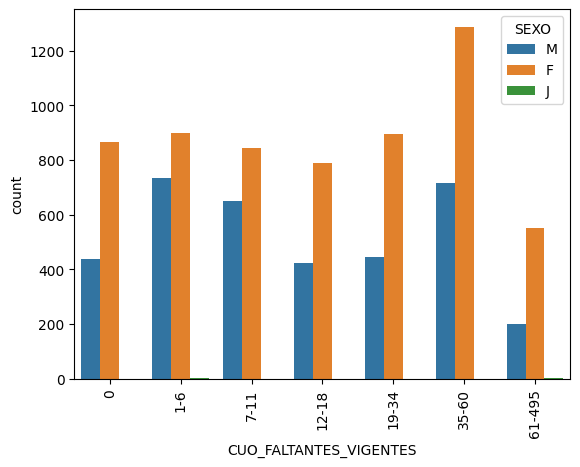

In [77]:
x = sns.countplot(data, x="CUO_FALTANTES_VIGENTES", hue="SEXO", dodge=True, order = ordenar(list(set(data['CUO_FALTANTES_VIGENTES'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27500\359375000.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


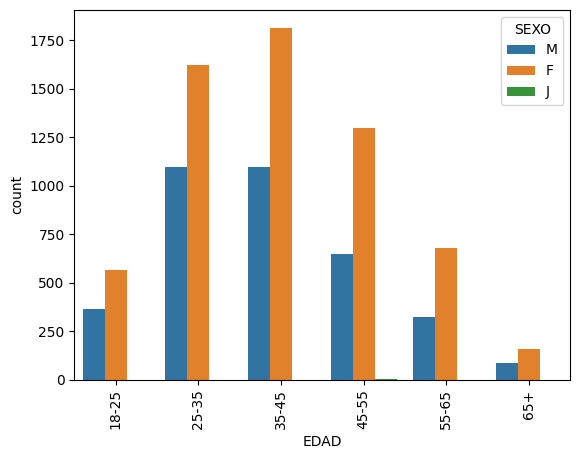

In [73]:
x = sns.countplot(data, x="EDAD", hue="SEXO", dodge=True,order=sorted(data['EDAD']))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27500\4252773097.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


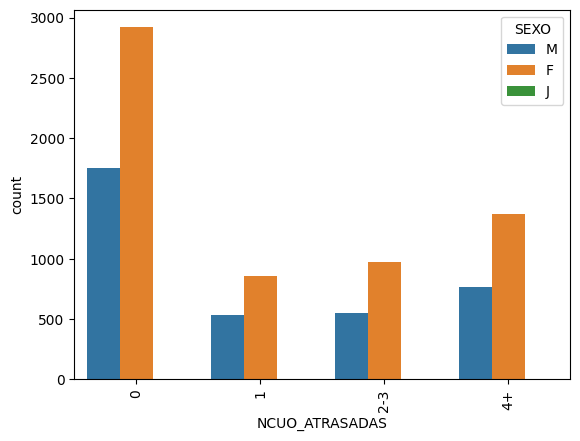

In [74]:
x = sns.countplot(data, x="NCUO_ATRASADAS", hue="SEXO", dodge=True,order=sorted(data['NCUO_ATRASADAS']))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27500\2145927868.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


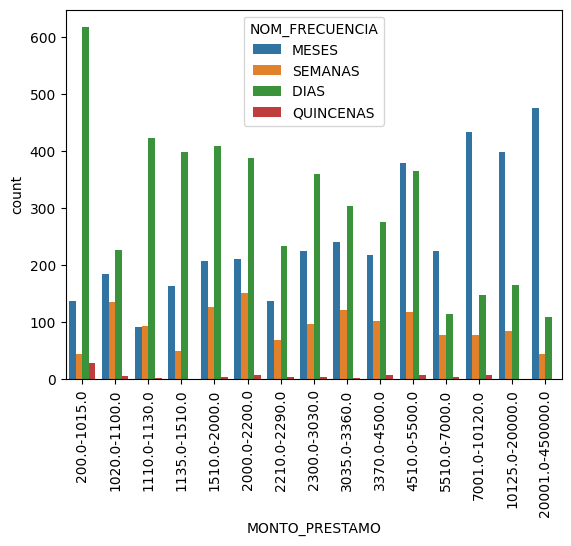

In [80]:
x = sns.countplot(data, x="MONTO_PRESTAMO", hue="NOM_FRECUENCIA", dodge=True, order = ordenar(list(set(data['MONTO_PRESTAMO'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27500\1858678919.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


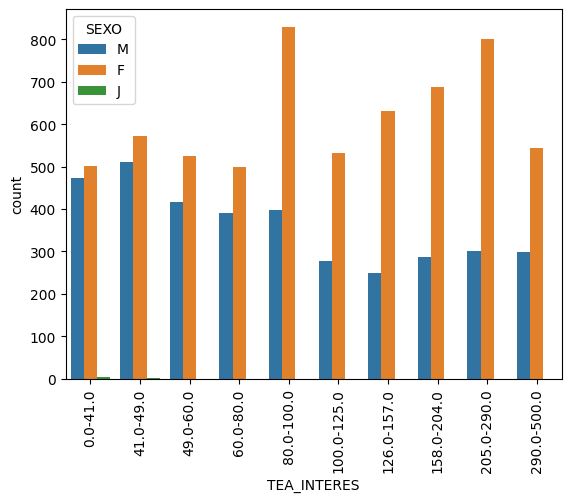

In [75]:
x = sns.countplot(data, x="TEA_INTERES", hue="SEXO", dodge=True, order = ordenar(list(set(data['TEA_INTERES'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27500\1711148524.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


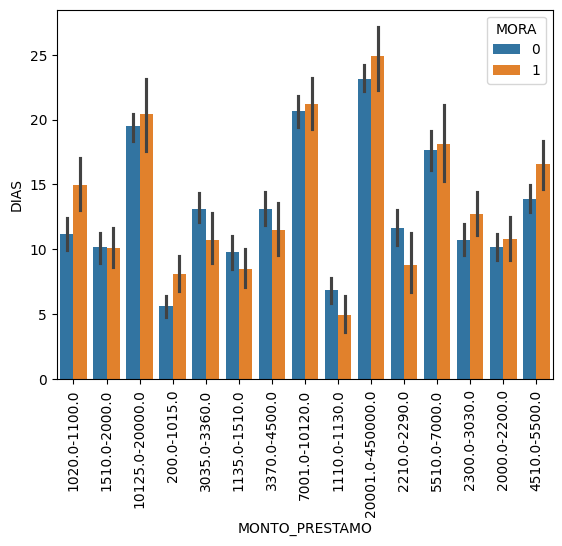

In [59]:
x = sns.barplot(data, x='MONTO_PRESTAMO', y='DIAS', hue='MORA') #,order = ordenar(list(set(data['MONTO_PRESTAMO'].unique()))));
x.set_xticklabels(x.get_xticklabels(), rotation=90);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27500\2581759448.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


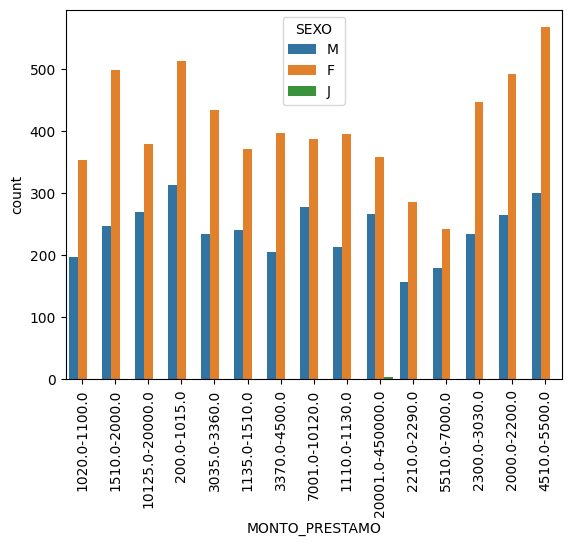

In [60]:
x = sns.countplot(data, x="MONTO_PRESTAMO", hue="SEXO", dodge=True) #,order=ordenar(list(set(data['MONTO_PRESTAMO'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27500\3355742883.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


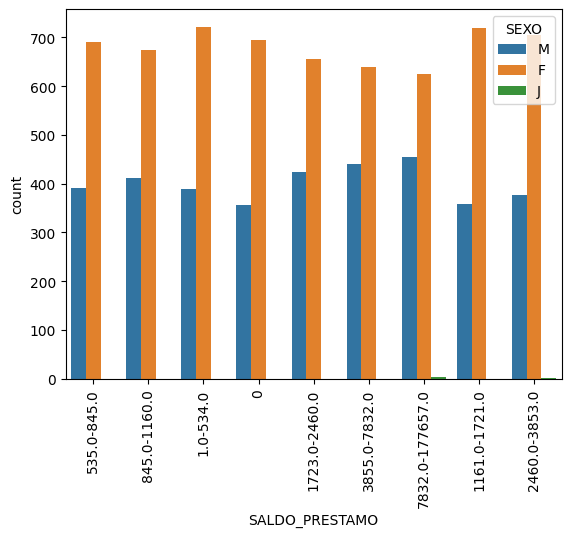

In [61]:
x = sns.countplot(data, x="SALDO_PRESTAMO", hue="SEXO", dodge=True) #,order=ordenar(list(set(data['SALDO_PRESTAMO'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);